# 3. Exploratory Data Analysis (EDA)

This notebook focuses on performing Exploratory Data Analysis (EDA) on the processed Immoweb dataset. We will load the cleaned data and begin to understand its distributions, relationships, and initial insights.

In [2]:
import pandas as pd
import os

# Define the path to the processed data file
processed_data_path = os.path.join('', '..', 'data', 'processed', 'immoweb_processed_data.csv')

# Load the data into a pandas DataFrame
try:
    df = pd.read_csv(processed_data_path)
    print('Processed data loaded successfully for EDA.')
    print('DataFrame Info:')
    df.info()
    print('First 5 rows:')
    display(df.head())
except FileNotFoundError:
    print(f'Error: The file was not found at {processed_data_path}')

Processed data loaded successfully for EDA.
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75511 entries, 0 to 75510
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              75511 non-null  int64  
 1   price                           75511 non-null  float64
 2   property_type                   75511 non-null  object 
 3   subproperty_type                75511 non-null  object 
 4   region                          75511 non-null  object 
 5   province                        75511 non-null  object 
 6   locality                        75511 non-null  object 
 7   zip_code                        75511 non-null  int64  
 8   latitude                        75511 non-null  float64
 9   longitude                       75511 non-null  float64
 10  construction_year               75511 non-null  float64
 11  total_area_sqm                  6

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,price_log,total_area_sqm_log,surface_land_sqm_log,terrace_sqm_log,garden_sqm_log
0,34221000,225000.0,APARTMENT,APARTMENT,Flanders,Antwerp,Antwerp,2050,51.217172,4.379982,...,MISSING,231.0,C,GAS,1,12.323860,4.615121,5.894403,1.791759,0.000000
1,2104000,449000.0,HOUSE,HOUSE,Flanders,East Flanders,Gent,9185,51.174944,3.845248,...,MISSING,221.0,C,MISSING,1,13.014780,NaN,6.523562,0.000000,0.000000
2,34036000,335000.0,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1070,50.842043,4.334543,...,AS_NEW,242.0,MISSING,GAS,0,12.721889,4.962845,5.894403,0.693147,0.000000
3,58496000,501000.0,HOUSE,HOUSE,Flanders,Antwerp,Turnhout,2275,51.238312,4.817192,...,MISSING,99.0,A,MISSING,0,13.124363,5.236442,6.226537,0.000000,0.000000
4,48727000,982700.0,APARTMENT,DUPLEX,Wallonia,Walloon Brabant,Nivelles,1410,50.900919,4.376713,...,AS_NEW,19.0,A+,GAS,0,13.798060,5.135798,5.894403,3.044522,4.962845


## T013: Summarize Observations and Features

We will now summarize the number of observations (rows) and features (columns) in our dataset. This provides a quick overview of the dataset's dimensions.

In [3]:
if 'df' in locals():
    print(f"Number of observations (rows): {df.shape[0]}")
    print(f"Number of features (columns): {df.shape[1]}")
    print("Column names:")
    for col in df.columns:
        print(f"- {col}")

Number of observations (rows): 75511
Number of features (columns): 34
Column names:
- id
- price
- property_type
- subproperty_type
- region
- province
- locality
- zip_code
- latitude
- longitude
- construction_year
- total_area_sqm
- surface_land_sqm
- nbr_frontages
- nbr_bedrooms
- equipped_kitchen
- fl_furnished
- fl_open_fire
- fl_terrace
- terrace_sqm
- fl_garden
- garden_sqm
- fl_swimming_pool
- fl_floodzone
- state_building
- primary_energy_consumption_sqm
- epc
- heating_type
- fl_double_glazing
- price_log
- total_area_sqm_log
- surface_land_sqm_log
- terrace_sqm_log
- garden_sqm_log


## T014: Classify Qualitative and Quantitative Variables

Understanding the nature of our variables (qualitative or quantitative) is crucial for selecting appropriate analysis and visualization techniques. We will classify the variables based on their data types and content.

In [4]:
if 'df' in locals():
    quantitative_vars = df.select_dtypes(include=['number', 'float64', 'int64', 'Int64']).columns.tolist()
    qualitative_vars = df.select_dtypes(include=['object']).columns.tolist()
    
    print(f"Number of quantitative variables: {len(quantitative_vars)}")
    print("Quantitative variables:")
    for col in quantitative_vars:
        print(f"- {col}")
        
    print(f"\nNumber of qualitative variables: {len(qualitative_vars)}")
    print("Qualitative variables:")
    for col in qualitative_vars:
        print(f"- {col}")

Number of quantitative variables: 25
Quantitative variables:
- id
- price
- zip_code
- latitude
- longitude
- construction_year
- total_area_sqm
- surface_land_sqm
- nbr_frontages
- nbr_bedrooms
- fl_furnished
- fl_open_fire
- fl_terrace
- terrace_sqm
- fl_garden
- garden_sqm
- fl_swimming_pool
- fl_floodzone
- primary_energy_consumption_sqm
- fl_double_glazing
- price_log
- total_area_sqm_log
- surface_land_sqm_log
- terrace_sqm_log
- garden_sqm_log

Number of qualitative variables: 9
Qualitative variables:
- property_type
- subproperty_type
- region
- province
- locality
- equipped_kitchen
- state_building
- epc
- heating_type


## T015: Analyze Distribution of Properties by Surface

We will now analyze the distribution of properties based on various surface-related features such as `total_area_sqm`, `surface_land_sqm`, `terrace_sqm`, and `garden_sqm`. This will help us understand the typical sizes and variations in property dimensions.

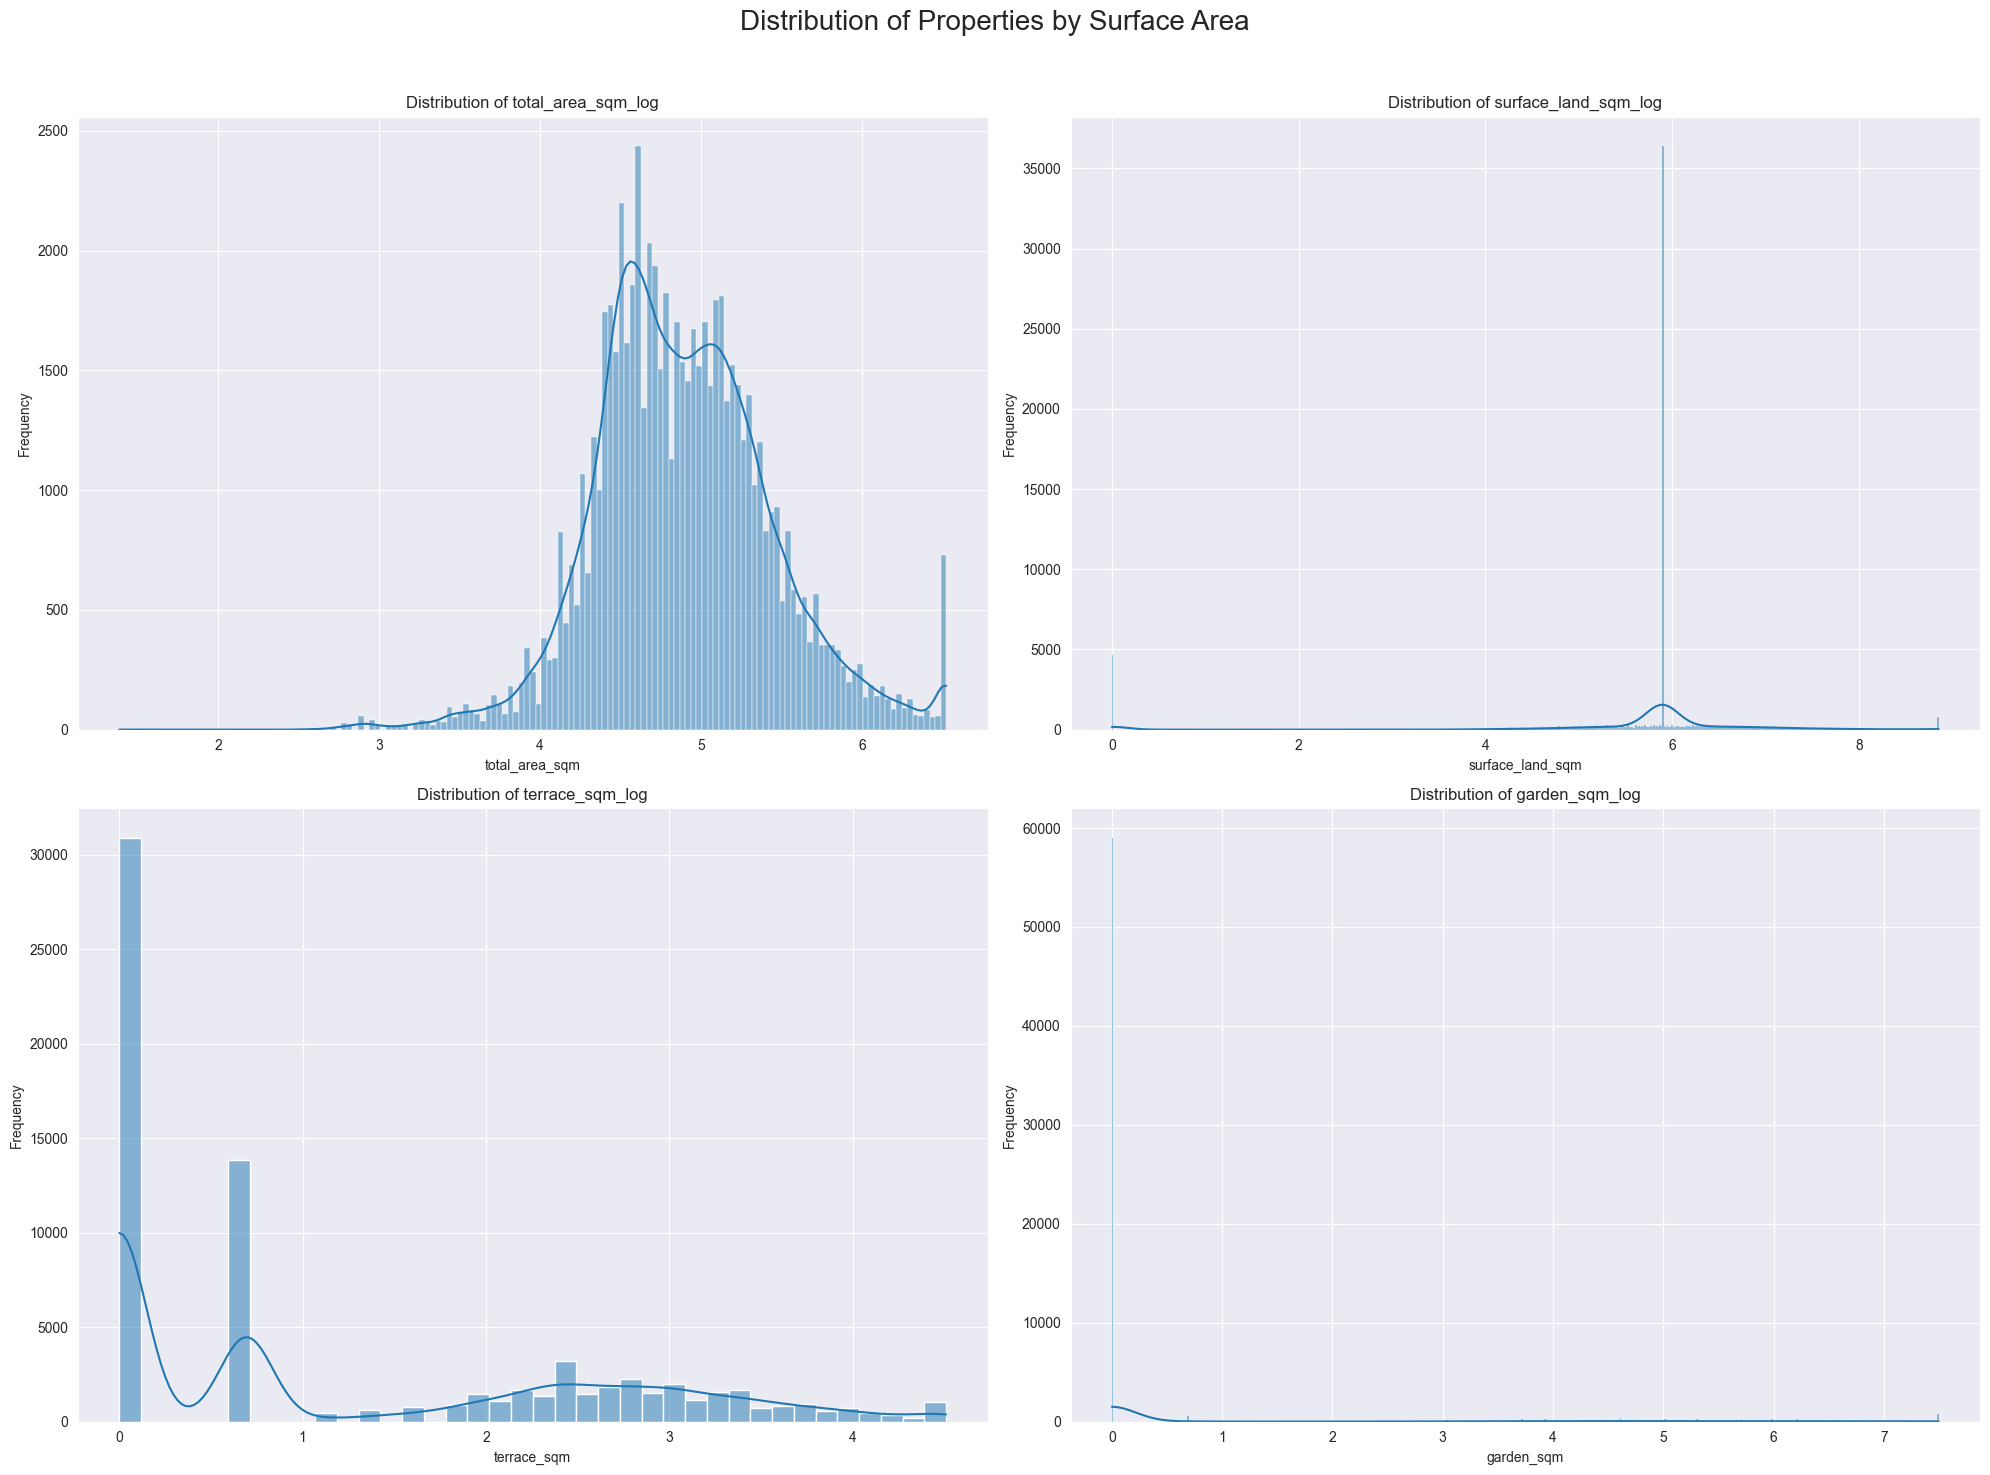


Descriptive statistics for surface areas:


,total_area_sqm,surface_land_sqm,terrace_sqm,garden_sqm
count,67896.000000,75511.000000,75511.000000,72572.000000
mean,155.513285,564.306247,8.847148,67.911784
std,103.491736,901.350011,15.893560,251.793631
min,3.000000,0.000000,0.000000,0.000000
25%,91.000000,342.000000,0.000000,0.000000
50%,127.000000,362.000000,1.000000,0.000000
75%,185.000000,384.000000,12.000000,0.000000
max,680.000000,7000.000000,90.000000,1800.000000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'df' in locals():
    surface_cols = ['total_area_sqm', 'surface_land_sqm', 'terrace_sqm', 'garden_sqm']
    
    plt.figure(figsize=(20, 15))
    plt.suptitle('Distribution of Properties by Surface Area', fontsize=20)
    
    for i, col in enumerate(surface_cols):
        col_log = f"{col}_log"
        if col_log in df.columns:
            plt.subplot(2, 2, i + 1)
            sns.histplot(df[col_log].dropna(), kde=True)
            plt.title(f'Distribution of {col_log}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
    
    plt.tight_layout(rect=(0, 0, 1, 0.96))
    plt.show()
    
    print("\nDescriptive statistics for surface areas:")
    display(df[surface_cols].describe())

## T016: Generate Initial Descriptive Statistics for All Variables

We will now generate descriptive statistics for all numerical variables in the dataset. This will provide a summary of the central tendency, dispersion, and shape of each variable's distribution.

In [6]:
if 'df' in locals():
    print("Descriptive statistics for all numerical variables:")
    display(df.describe())

Descriptive statistics for all numerical variables:


,id,price,zip_code,latitude,longitude,construction_year,total_area_sqm,surface_land_sqm,nbr_frontages,nbr_bedrooms,...,garden_sqm,fl_swimming_pool,fl_floodzone,primary_energy_consumption_sqm,fl_double_glazing,price_log,total_area_sqm_log,surface_land_sqm_log,terrace_sqm_log,garden_sqm_log
count,7.551100e+04,7.551100e+04,75511.000000,75511.000000,75511.000000,75511.000000,67896.000000,75511.000000,75511.000000,75511.000000,...,72572.000000,75511.000000,75511.000000,7.551100e+04,75511.000000,75511.000000,67896.000000,75511.000000,75511.000000,72572.000000
mean,3.973235e+07,4.097310e+05,5144.609342,50.889293,4.337632,1988.648502,155.513285,564.306247,2.871688,2.787276,...,67.911784,0.018686,0.543828,1.179739e+03,0.676762,12.741793,4.891707,5.636256,1.275061,0.927342
std,2.290417e+07,3.157603e+05,3005.490110,0.315444,0.857756,31.379931,103.491736,901.350011,0.723591,1.894188,...,251.793631,0.135415,0.498079,1.279552e+05,0.467716,0.564127,0.553156,1.623483,1.386241,2.052265
min,0.000000e+00,7.600000e+04,1000.000000,25.761680,-80.191790,1753.000000,3.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,-1.400000e+02,0.000000,11.238502,1.386294,0.000000,0.000000,0.000000
25%,1.989350e+07,2.420000e+05,2240.000000,50.786217,3.994803,1984.000000,91.000000,342.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,1.890000e+02,0.000000,12.396697,4.521789,5.837730,0.000000,0.000000
50%,3.972200e+07,3.290000e+05,4683.000000,50.900919,4.376713,1994.000000,127.000000,362.000000,3.000000,3.000000,...,0.000000,0.000000,1.000000,2.420000e+02,1.000000,12.703816,4.852030,5.894403,0.693147,0.000000
75%,5.954100e+07,4.550000e+05,8370.000000,51.098697,4.694103,2003.000000,185.000000,384.000000,3.000000,3.000000,...,0.000000,0.000000,1.000000,3.000000e+02,1.000000,13.028055,5.225747,5.953243,2.564949,0.000000
max,7.948500e+07,2.195000e+06,9992.000000,52.434244,6.385048,2024.000000,680.000000,7000.000000,47.000000,200.000000,...,1800.000000,1.000000,1.000000,2.023112e+07,1.000000,14.601693,6.523562,8.853808,4.510860,7.496097


## T017: Identify Variables to Potentially Delete and Justify

Based on our initial data quality checks and descriptive statistics, we will now identify variables that could potentially be removed from the dataset. This decision will be based on factors such as high cardinality, low variance, redundancy, or irrelevance to the primary analysis goals (e.g., predicting property price).

In [7]:
if 'df' in locals():
    # Identify variables with very high cardinality (many unique values) that might not be useful as direct features
    # 'id' is a unique identifier and typically not used as a feature in modeling
    high_cardinality_vars = ['id']
    
    # Identify variables with very low variance (almost all values are the same) or constant values
    # These variables provide little to no information for predictive models
    low_variance_vars = []
    for col in df.columns:
        if df[col].nunique() < 2 and col not in high_cardinality_vars:
            low_variance_vars.append(col)
            
    # Consider other variables based on domain knowledge or potential redundancy
    # For example, 'zip_code' might be redundant if 'locality', 'region', and 'province' are used,
    # or it might be kept for more granular geographical analysis.
    # 'latitude' and 'longitude' could be considered for removal if a simpler geographical feature is preferred,
    # or if they introduce too much noise without proper feature engineering.
    # For this initial pass, we'll focus on 'id' as a clear candidate.
    
    variables_to_delete = []
    
    if 'id' in df.columns:
        variables_to_delete.append('id')
        print("Reason for deleting 'id': Unique identifier, not a predictive feature.")
        
    if low_variance_vars:
        print("\nVariables with very low variance (potential candidates for deletion):")
        for var in low_variance_vars:
            print(f"- {var}: Only {df[var].nunique()} unique value(s).")
            # Add to deletion list if desired, e.g., variables_to_delete.append(var)
            
    if variables_to_delete:
        print(f"\nProposed variables for deletion: {variables_to_delete}")
    else:
        print("\nNo obvious variables identified for deletion based on initial criteria.")

Reason for deleting 'id': Unique identifier, not a predictive feature.

Proposed variables for deletion: ['id']
